Playing around with jupyter in vs code, because editing is way easier.

Check out latex:

$ \sum_{x = i}^n $

In [1]:
class MyClass():
    def __init__(self, x):
        self.x = x

class NewClass(MyClass):
    def __init__(self, y):
        self.x = y + 1
        self.y = y

m = MyClass(3)
n = NewClass(4)

print(m.x)
print(n.x, n.y)


3
5 4


In [2]:
import requests

import pandas as pd

def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df


In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2021-06-06 13:07:12.250278')

In [4]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [5]:
eth = get_historic_price('eth', 'bitstamp', last_week)

In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-06-06 14:00:00,35874.09,36032.91,35570.50,35649.16,150.781227,5.393926e+06
2021-06-06 15:00:00,35620.26,36225.20,35466.96,36136.68,130.225047,4.659649e+06
2021-06-06 16:00:00,36131.09,36439.89,36063.89,36163.93,99.235715,3.593482e+06
2021-06-06 17:00:00,36163.02,36330.16,36119.31,36261.62,68.507840,2.481421e+06
2021-06-06 18:00:00,36242.84,36242.84,35934.02,36048.50,53.905771,1.945828e+06


<AxesSubplot:xlabel='CloseTime'>

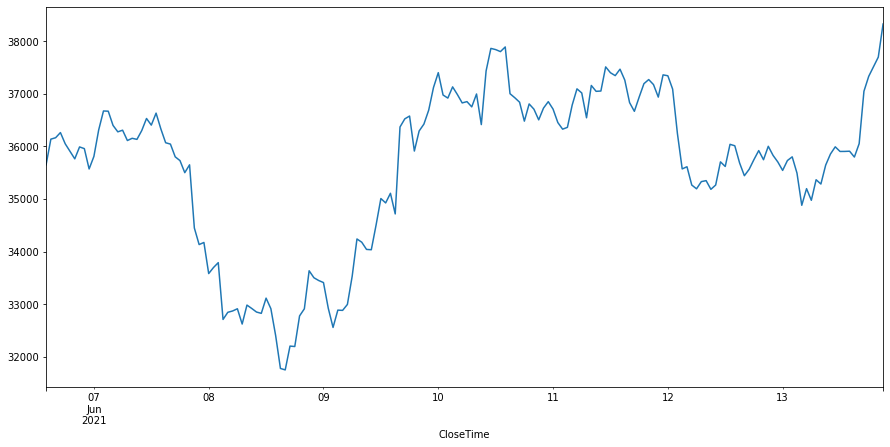

In [7]:
btc['ClosePrice'].plot(figsize=(15, 7))

In [8]:
eth = get_historic_price('eth', 'bitstamp', last_week)

In [9]:
eth.head()


,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2021-06-06 14:00:00,2692.27,2704.70,2653.99,2660.56,1128.079122,3.016858e+06
2021-06-06 15:00:00,2660.66,2714.00,2655.36,2708.83,1054.526352,2.829870e+06
2021-06-06 16:00:00,2709.36,2733.96,2705.61,2720.80,906.587471,2.465770e+06
2021-06-06 17:00:00,2723.91,2737.88,2715.93,2720.03,766.411879,2.088767e+06
2021-06-06 18:00:00,2719.90,2720.50,2685.07,2692.07,603.351489,1.630294e+06


In [10]:
!pip3 install requests

dyld: Library not loaded: /System/Library/Frameworks/CoreFoundation.framework/Versions/A/CoreFoundation
  Referenced from: /Library/Frameworks/Python.framework/Versions/3.6/Resources/Python.app/Contents/MacOS/Python
  Reason: image not found
